# Using Embedding Layers
## CH6: Deep Learning for text and sequences
### Deep Learning with Keras pg. 187
---  
Embedding layers (run as transformation matrix) map a string to a series of bits. 
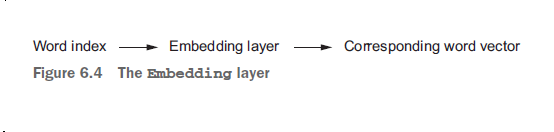
### CONTENT
- *__Step 01:__* Load IMDB dataset
- *__Step 02:__* Build and Train the model with *Embedding Layer*

In [9]:
# Step 01: Load IMDB dataset

from tensorflow import keras
from keras.datasets import imdb
from keras import preprocessing

max_features= 10000
maxlen= 20

(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words= max_features)

x_train= preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test= preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
# Step 02: Build and Train the model with Embedding Layer

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model= keras.Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics=['acc'])
model.summary()

history= model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6732 - acc: 0.6130 - val_loss: 0.6296 - val_acc: 0.6894
Epoch 2/10
625/625 [==============================] - 1s 834us/step - loss: 0.5532 - acc: 0.7471 - val_loss: 0.5332 - val_acc: 0.7248
Epoch 3/10
625/625 [==============================] - 0s 794us/step - loss: 0.4651 - acc: 0.7879 - val_loss: 0.503